**Problem 3.** Write a generator for a non-homogeneous Poisson process $N(t)$ with a given intensity function $\lambda(t)$ on the time interval $[T_1, T_2]$. The expected result is a plot of a sample path (trajectory) of the process $N(t)$. Run a series of simulations with $n (= 10, 100, 1000, 10000, \ldots)$. Based on these simulations, empirically estimate the intensity and compare it with the given intensity function.


We consider a switch port that receives packages over one second with intensity $\lambda(t) = (1 − t)^2,t \in [0, 1].$

We want to plot a sample path of $N(t)$ - number of arrivals (events) by time $t$ on the interval $[0, 1]$.

Let $t_1, t_2, \ldots, t_n$ be the arrival times of the packages.

1. Generate arrival times.
2. Calculate $N(t)$ path.

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

$\forall t \in [0, 1] \lambda_{max}=1 \geq \lambda (t)$

**Thinning method:**
1. Generate arrivals with intensity = $\lambda_{max}$.
2. Left each generated time in the moment $t$ with probability $\frac{\lambda(t)}{\lambda_{max}}$, otherwise remove arrival time.

**Proof**
Using third definition of non-homogeneous poisson process

1. $P(N_n[t; t+\Delta t] = 1) =
\\ P(N_n[t; t+\Delta t] = 1| N_h(t; t+\Delta t) = 1) P(N_h(t; t+\Delta t) = 1) + 
\\ P(N_n[t; t+\Delta t] =1 | N_h(t; t+\Delta t) \geq 2) P(N_h(t; t+\Delta t \geq 2)) + 
\\ P(N_n[t; t+\Delta t] =1| N_h(t; t+\Delta t) = 0) P(N_h(t; t+\Delta t) = 0) $

a
$$
P( N_n = 1 \mid \Delta N_h = 1)
=
\frac{\lambda(t)}{\lambda_{\max}} + o(1)
$$

$$
 P( N_h = 1)
=
\lambda_{\max}\Delta t + o(\Delta t)
$$

$$
 P( N_n = 1 \mid  N_h = 1)
 P( N_h = 1)
=
\lambda(t)\Delta t + o(\Delta t)
$$
b.

$$
 P( N_h \ge 2)
=
o( t)
$$

$$
0 \le
 P( N_n = 1 | N_h \geq 2)
\le 1
$$
$$

 P( N_n = 1 |  N_h \geq 2)
 P( N_h \geq 2)
=
o(\Delta t)
$$

c.
$$
 P( N_n = 1 \mid  N_h = 0)
=
0
$$
$$
 P( N_h = 0)
=
1 - \lambda_{\max}\Delta t + o(\Delta t)
$$
$$
 P( N_n = 1 \mid  N_h = 0)
 P( N_h = 0)
=
0
$$

The same applies to the other two conditions.

In [295]:
def intensity(t):
    return (1 - t) ** 2

In [296]:
from typing import Callable


def generate_arrivals(intensity: Callable[[float], float], lambda_max, t_max):
    rng = np.random.default_rng()
    t = 0
    arrivals = []
    while True:
        X = rng.exponential(1 / lambda_max)
        t += X
        if t > t_max:
            break

        if rng.random() < intensity(t):
            arrivals.append(t)
    return arrivals

In [297]:
generate_arrivals(intensity, 1, 1)

[]

In [298]:
def plot_path(arrivals, t_max):
    times = [0] + arrivals + [t_max]
    counts = [0] + list(range(1, len(arrivals) + 1)) + [len(arrivals)]

    plt.step(times, counts, where="post")
    plt.xlabel("t")
    plt.ylabel("N(t)")
    plt.title("Sample path")
    plt.show()

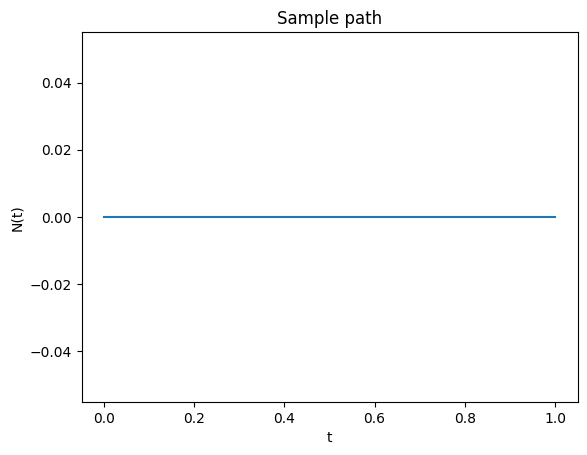

In [299]:
t_max = 1
arrivals = generate_arrivals(intensity, 1, t_max)
for _ in range(1):
    plot_path(arrivals, t_max)

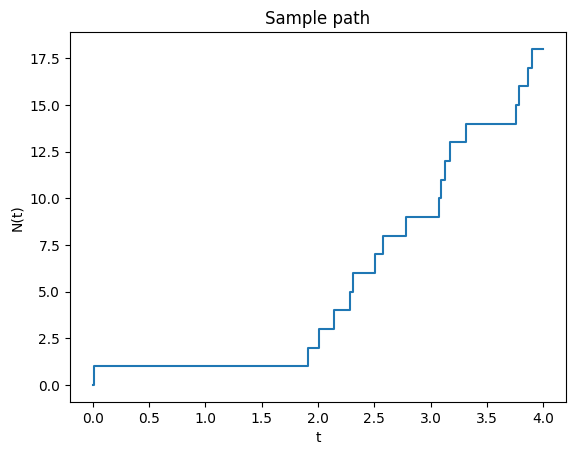

In [300]:
t_max = 4
arrivals = generate_arrivals(intensity, 9, t_max)
for _ in range(1):
    plot_path(arrivals, t_max)

$$
\lambda = \frac{\textbf{|events|}}{\Delta t}=\frac{\textbf{|all\_events|}}{n \cdot \Delta t}
$$

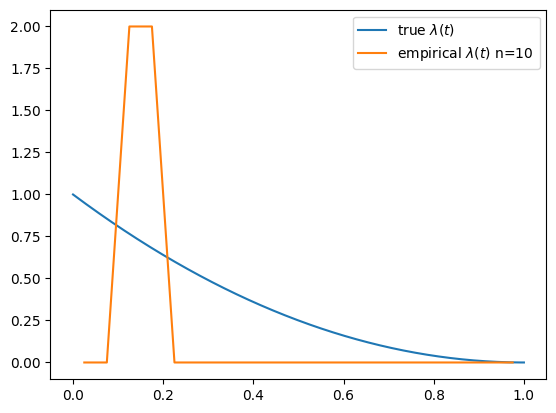

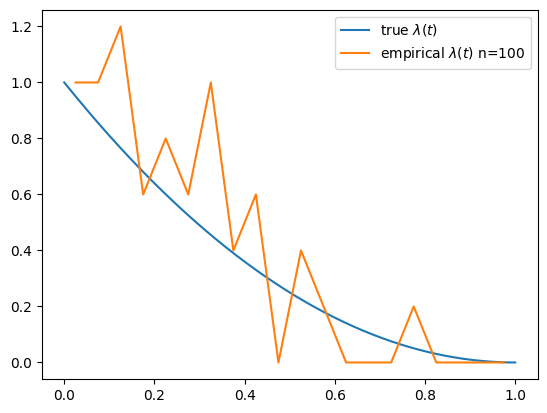

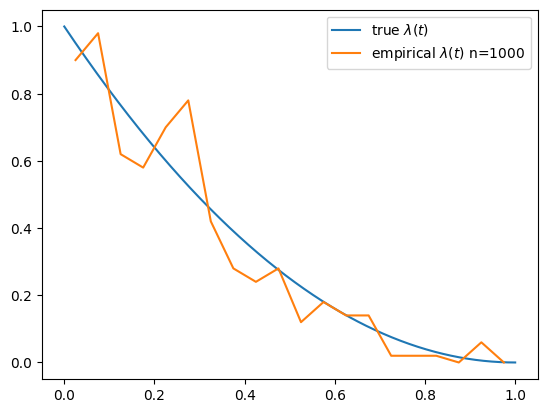

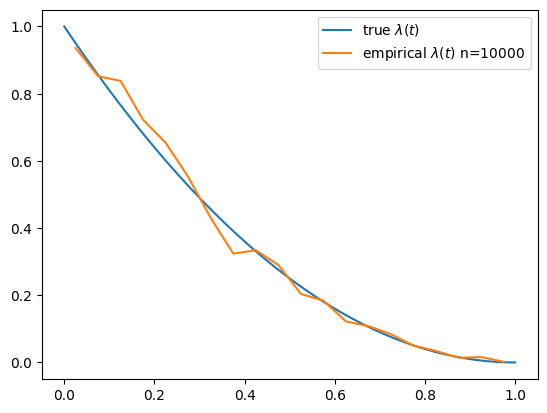

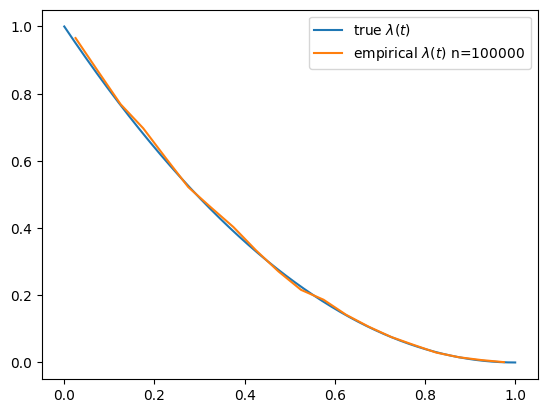

In [301]:
bins = np.arange(0, 1.05, 0.05)
ns = [10, 100, 1000, 10_000, 100_000]
for n in ns:
    all_events = []
    for _ in range(n):
        for event in generate_arrivals(intensity, 1, 1):
            all_events.append(event)
    counts, edges = np.histogram(all_events, bins=bins)

    lambda_emperical = counts / (n * 0.05)
    centers = (edges[:-1] + edges[1:]) / 2

    t = np.linspace(0, 1, 1000)
    plt.plot(t, intensity(t), label=r"true $\lambda(t)$")
    plt.plot(centers, lambda_emperical, label=rf"empirical $\lambda (t)$ n={n}")
    plt.legend()
    plt.show()